In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
wild_type = "VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK"

In [6]:
def find_prot_seq_code(sequence):
    seq_code = 0
    for i in range(len(sequence)):
        seq_code += ord(sequence[i])
    return seq_code

In [7]:
wild_type_code=find_prot_seq_code(wild_type)
wild_type_code

16805

In [8]:
df.protein_sequence.apply(find_prot_seq_code)

0         25672
1         21516
2         37558
3         19971
4        112325
          ...  
31385     41919
31386     35758
31387      9723
31388     45173
31389     41432
Name: protein_sequence, Length: 31390, dtype: int64

In [9]:
df["prot_seq_code"] = df.protein_sequence.apply(find_prot_seq_code)

In [10]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm,prot_seq_code
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,25672
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,21516
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,37558
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,19971
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,112325


In [11]:
# code difference between wild type and mutations

code_diff = df.prot_seq_code - wild_type_code
code_diff

0         8867
1         4711
2        20753
3         3166
4        95520
         ...  
31385    25114
31386    18953
31387    -7082
31388    28368
31389    24627
Name: prot_seq_code, Length: 31390, dtype: int64

In [12]:
(code_diff == 0).sum()

2

In [13]:
df["code_diff"] = code_diff

In [14]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm,prot_seq_code,code_diff
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,25672,8867
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,21516,4711
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,37558,20753
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,19971,3166
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,112325,95520


In [15]:
df.corr()

,seq_id,pH,tm,prot_seq_code,code_diff
seq_id,1.000000,-0.040164,0.008750,-0.001679,-0.001679
pH,-0.040164,1.000000,-0.044544,0.020202,0.020202
tm,0.008750,-0.044544,1.000000,-0.059282,-0.059282
prot_seq_code,-0.001679,0.020202,-0.059282,1.000000,1.000000
code_diff,-0.001679,0.020202,-0.059282,1.000000,1.000000


<IPython.core.display.Javascript object>

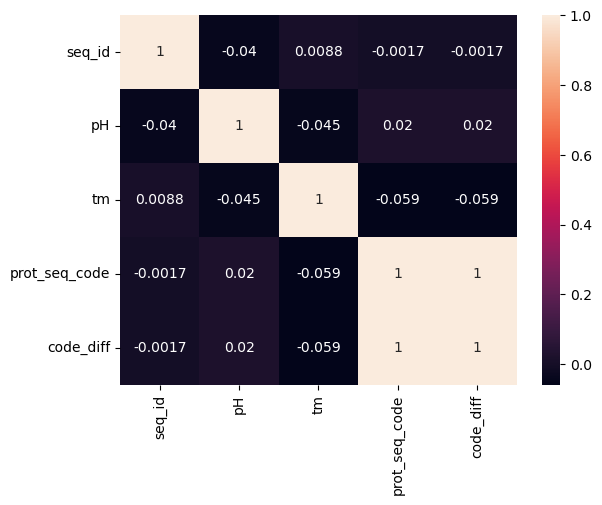

In [16]:
sns.heatmap(df.corr(), annot=True);

In [17]:
df.nunique()

seq_id              31390
protein_sequence    28981
pH                    115
data_source           324
tm                    770
prot_seq_code       21576
code_diff           21576
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
prot_seq_code          0
code_diff              0
dtype: int64

<IPython.core.display.Javascript object>

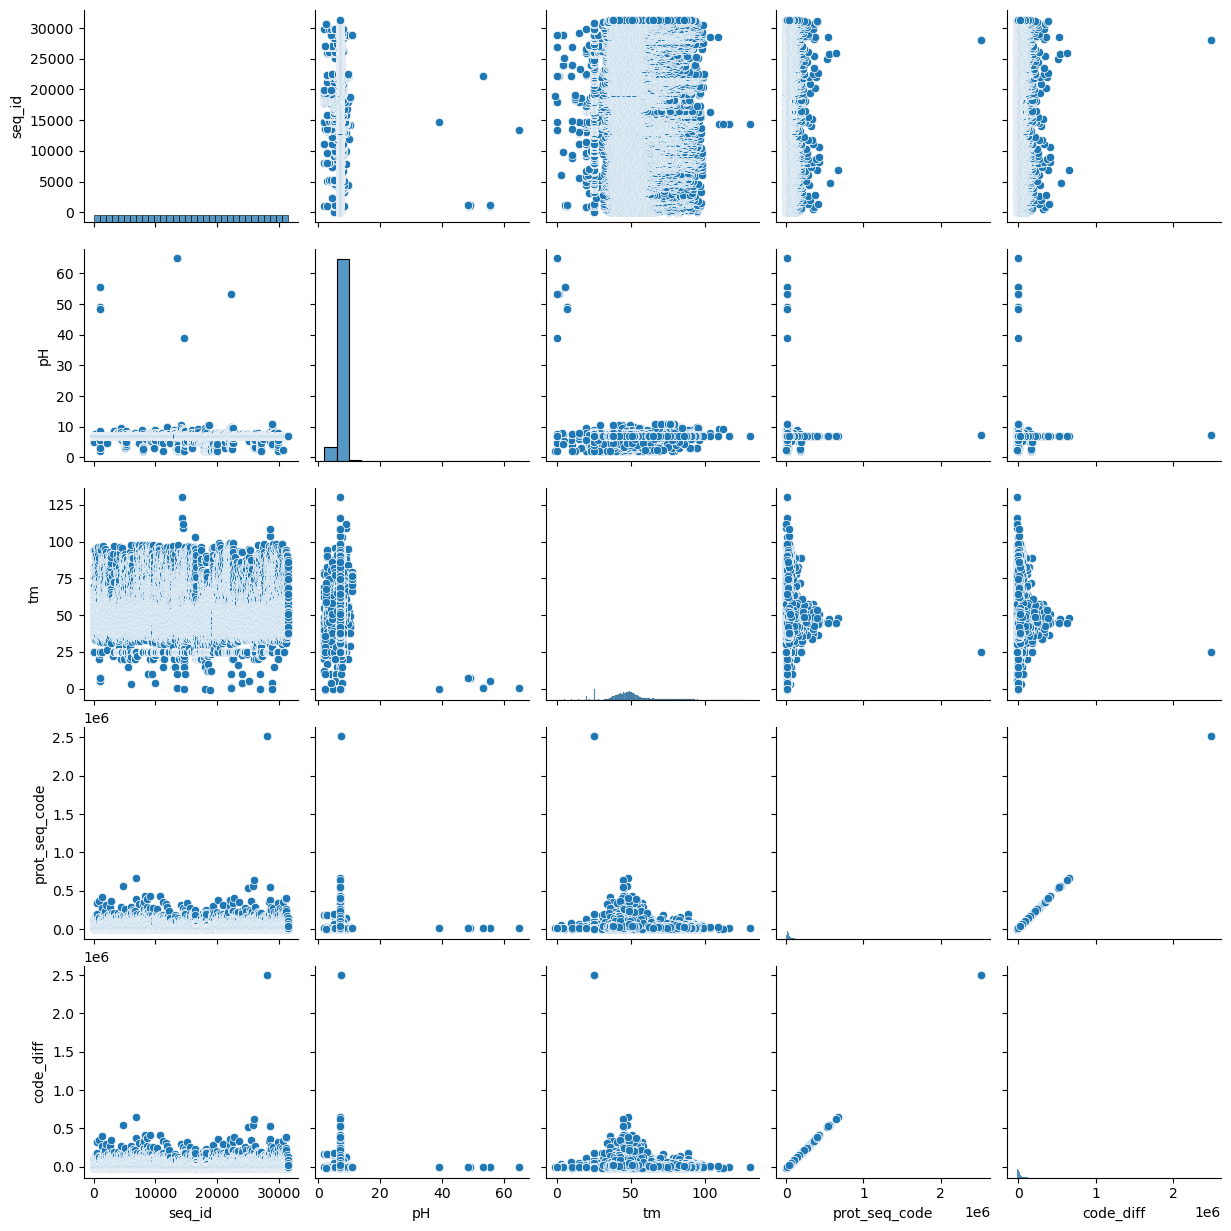

In [20]:
sns.pairplot(df);

In [21]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm,prot_seq_code,code_diff
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,25672,8867
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,21516,4711
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,37558,20753
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,19971,3166
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,112325,95520


In [22]:
X = df.drop(columns= ["seq_id", "protein_sequence", "data_source", "prot_seq_code", "tm"])
y = df.tm

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [24]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=101)

In [25]:
model.fit(X_train, y_train)

[15:05:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=101)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [28]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.189956,0.195090
mae,9.047816,8.935616
mse,159.545993,155.773027
rmse,12.631152,12.480907


In [29]:
df_test = pd.read_csv("test.csv")

In [30]:
df_test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [31]:
df_test["prot_seq_code"] = df_test.protein_sequence.apply(find_prot_seq_code)

In [32]:
df_test["code_diff"] = df.prot_seq_code - wild_type_code
df_test.head()

,seq_id,protein_sequence,pH,data_source,prot_seq_code,code_diff
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16798,8867
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16804,4711
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,16729,20753
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16797,3166
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16800,95520


In [33]:
df_test[["pH","code_diff"]].head()

,pH,code_diff
0,8,8867
1,8,4711
2,8,20753
3,8,3166
4,8,95520


In [34]:
X_train.head()

,pH,code_diff
23819,7.0,17720
30125,7.0,-3467
17067,7.0,844
15075,7.0,4318
17401,7.0,34199


In [35]:
model.predict(df_test[["pH","code_diff"]])

array([49.793953, 49.793953, 54.988968, ..., 54.988968, 46.273525,
       43.08362 ], dtype=float32)

In [76]:
df.describe()

,seq_id,pH,tm,prot_seq_code,code_diff
count,31390.000000,31104.000000,31390.000000,3.139000e+04,3.139000e+04
mean,15694.500000,6.892339,49.147337,3.408673e+04,1.728173e+04
std,9061.656811,1.612225,14.010089,4.902047e+04,4.902047e+04
min,0.000000,1.990000,-1.000000,3.890000e+02,-1.641600e+04
25%,7847.250000,7.000000,42.100000,1.499050e+04,-1.814500e+03
50%,15694.500000,7.000000,48.000000,2.547450e+04,8.669500e+03
75%,23541.750000,7.000000,53.800000,3.986800e+04,2.306300e+04
max,31389.000000,64.900000,130.000000,2.512992e+06,2.496187e+06


In [36]:
df_numeric= df.select_dtypes(exclude="O")
df_numeric.head()

,seq_id,pH,tm,prot_seq_code,code_diff
0,0,7.0,75.7,25672,8867
1,1,7.0,50.5,21516,4711
2,2,7.0,40.5,37558,20753
3,3,7.0,47.2,19971,3166
4,4,7.0,49.5,112325,95520


## outlier lara bakılacak

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

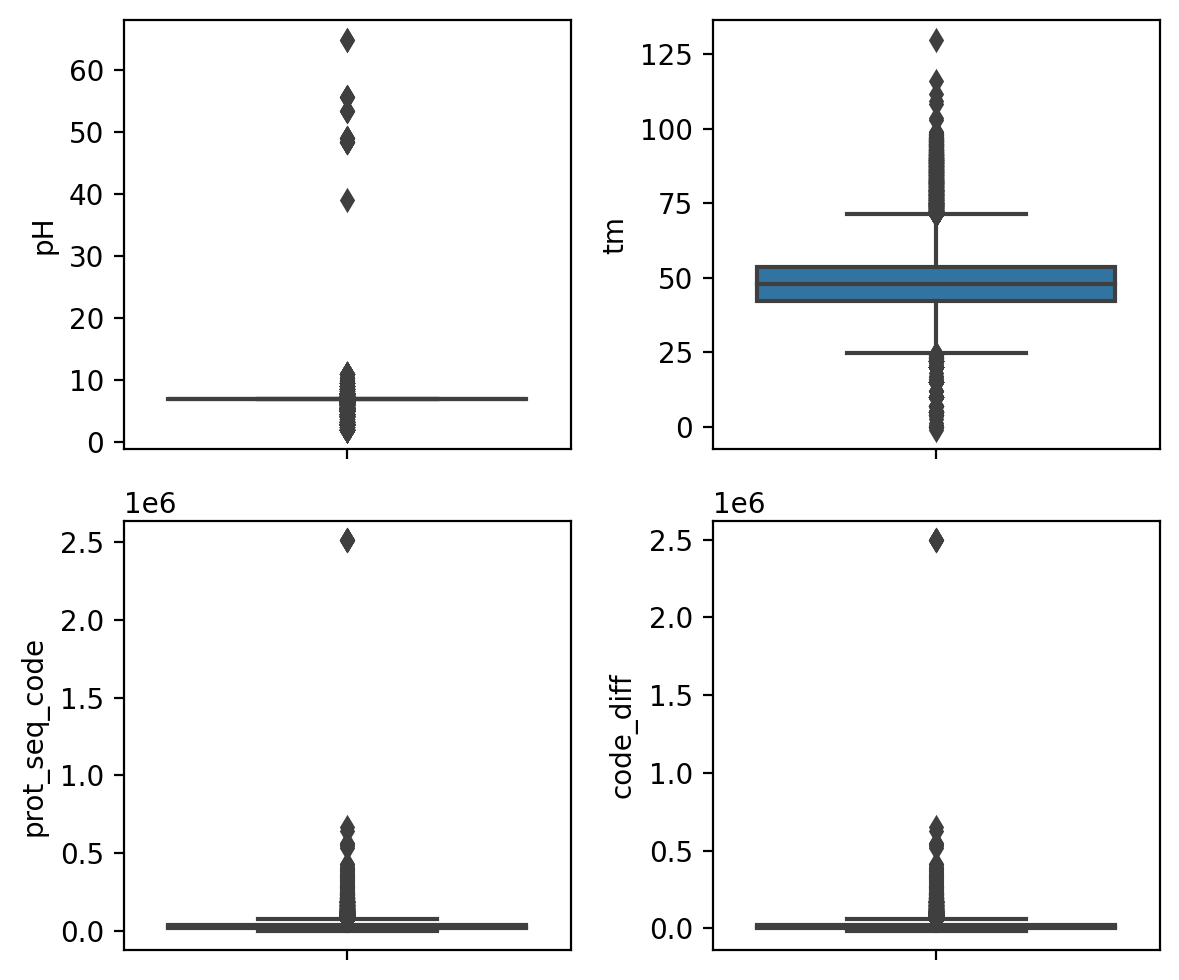

In [43]:
fig = plt.figure(figsize=(6,5), dpi=200)
for i, col in enumerate(df_numeric.iloc[:,1:]):
        plt.subplot(2,2,i+1)
        sns.boxplot(y=col, data=df_numeric)
plt.tight_layout();

In [53]:
def iqr_lower_upper (col, fold=1.5) :
    global lower, upper
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 -q1
    lower = round(q1 - fold*iqr, 2)
    upper = round(q3 + fold*iqr, 2)
    nr_extreme = df.loc[(df[col] < lower) | (df[col] > upper)].shape[0] 
    print(f"lower limit : {lower}\nupper limit: {upper}\nthe number of extreme values outside the lower and upper limits : {nr_extreme}")

In [56]:
for col in df_numeric.columns[1:]:
    print(f"For {col} feature:")
    print("---"*10)
    iqr_lower_upper(col)
    print("###"*10)

For pH feature:
------------------------------
lower limit : 7.0
upper limit: 7.0
the number of extreme values outside the lower and upper limits : 4642
##############################
For tm feature:
------------------------------
lower limit : 24.55
upper limit: 71.35
the number of extreme values outside the lower and upper limits : 3378
##############################
For prot_seq_code feature:
------------------------------
lower limit : -22325.75
upper limit: 77184.25
the number of extreme values outside the lower and upper limits : 2022
##############################
For code_diff feature:
------------------------------
lower limit : -39130.75
upper limit: 60379.25
the number of extreme values outside the lower and upper limits : 2022
##############################


In [58]:
# fold=2 için outlier değerler
for col in df_numeric.columns[1:]:
    print(f"For {col} feature:")
    print("---"*10)
    iqr_lower_upper(col, fold=2)
    print("###"*10)

For pH feature:
------------------------------
lower limit : 7.0
upper limit: 7.0
the number of extreme values outside the lower and upper limits : 4642
##############################
For tm feature:
------------------------------
lower limit : 18.7
upper limit: 77.2
the number of extreme values outside the lower and upper limits : 1872
##############################
For prot_seq_code feature:
------------------------------
lower limit : -34764.5
upper limit: 89623.0
the number of extreme values outside the lower and upper limits : 1400
##############################
For code_diff feature:
------------------------------
lower limit : -51569.5
upper limit: 72818.0
the number of extreme values outside the lower and upper limits : 1400
##############################


In [59]:
(df.pH>14).sum()

29

In [75]:
(df.pH<0).sum()

0

In [62]:
df_numeric =df_numeric[df.pH<14]

In [66]:
df_numeric.prot_seq_code.sort_values(ascending=False).head(10)

28085    2512992
28084    2512982
28080    2512968
28081    2512965
28082    2512965
28079    2512955
28083    2512955
6875      669053
25869     642586
4735      563433
Name: prot_seq_code, dtype: int64

In [67]:
df_numeric=df_numeric[df_numeric.prot_seq_code<1000000]

In [69]:
df_numeric.shape

(31068, 5)

In [70]:
df.shape

(31390, 7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

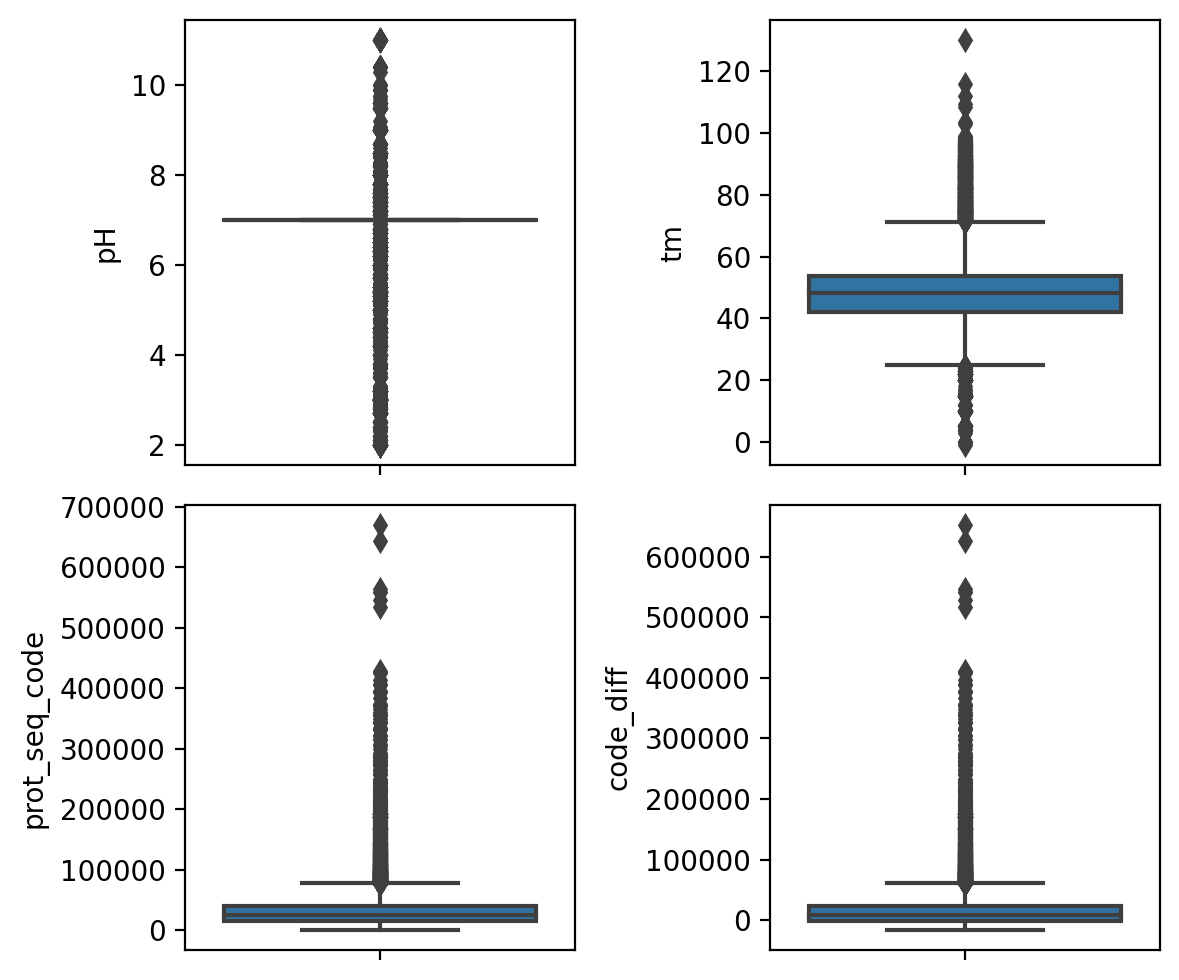

In [71]:
fig = plt.figure(figsize=(6,5), dpi=200)
for i, col in enumerate(df_numeric.iloc[:,1:]):
        plt.subplot(2,2,i+1)
        sns.boxplot(y=col, data=df_numeric)
plt.tight_layout();

## Modeling without outliers

<IPython.core.display.Javascript object>

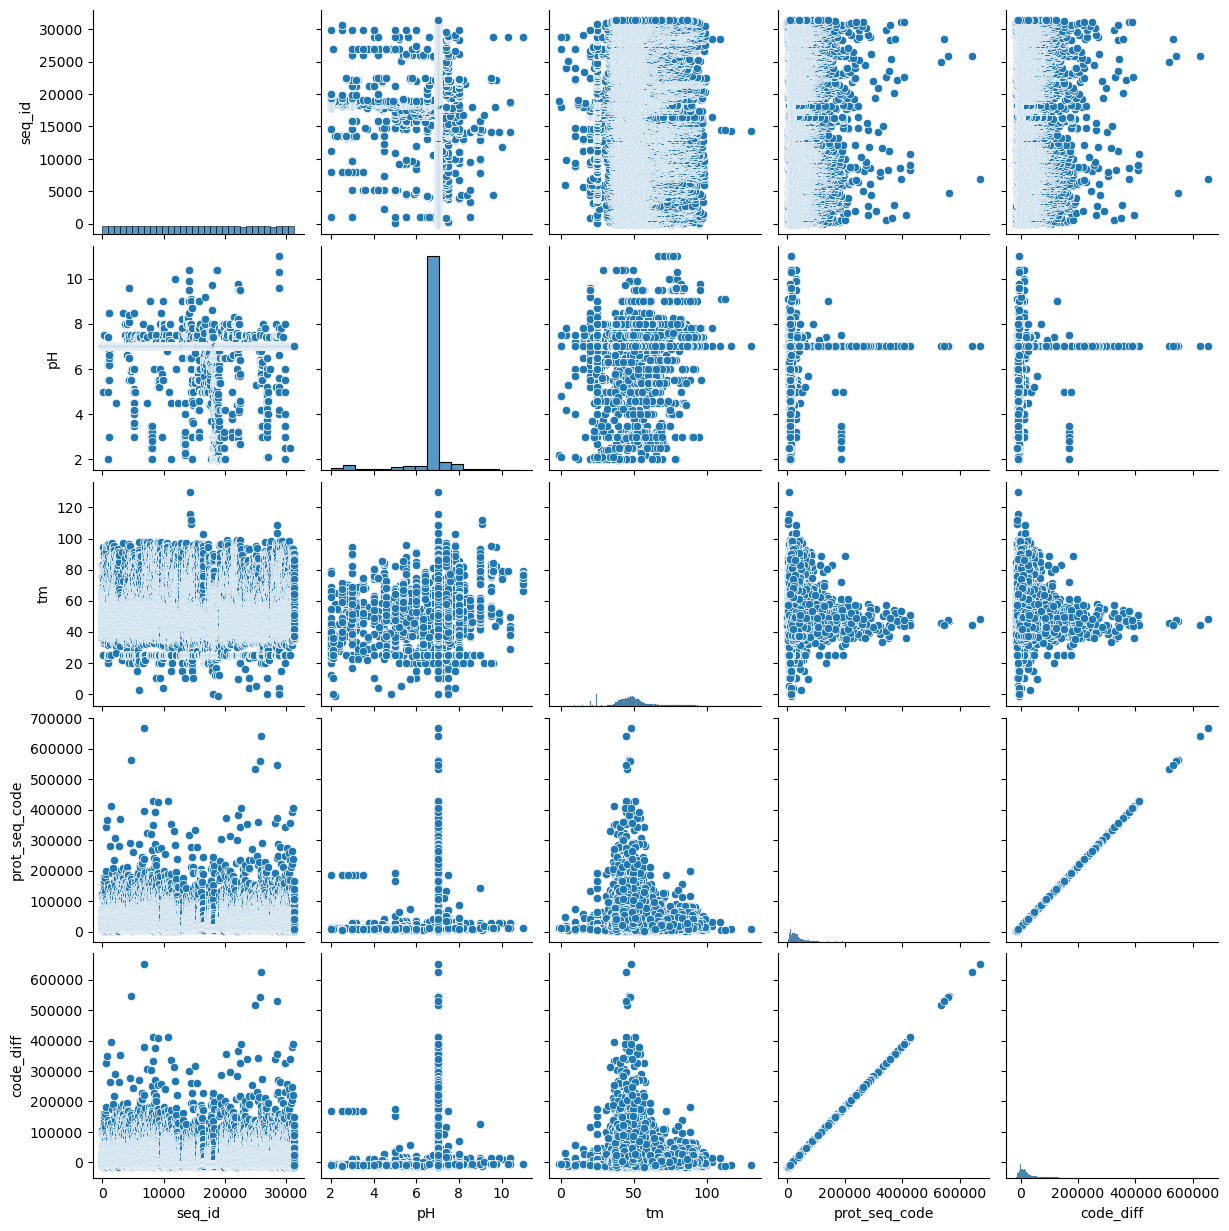

In [72]:
sns.pairplot(df_numeric);

In [73]:
df_numeric.columns

Index(['seq_id', 'pH', 'tm', 'prot_seq_code', 'code_diff'], dtype='object')

In [89]:
X = df_numeric.drop(columns= ["seq_id", "tm", "code_diff"])
y = df_numeric.tm

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [91]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=101)

In [92]:
model.fit(X_train, y_train)

[23:43:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=101)

In [93]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.197243,0.176631
mae,9.028404,9.020441
mse,157.785646,157.578998
rmse,12.561276,12.553047


In [94]:
df_test.head()

,seq_id,protein_sequence,pH,data_source,prot_seq_code,code_diff
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16798,8867
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16804,4711
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,16729,20753
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16797,3166
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,16800,95520


In [95]:
df_test[["pH","prot_seq_code"]].head()

,pH,prot_seq_code
0,8,16798
1,8,16804
2,8,16729
3,8,16797
4,8,16800


In [96]:
X_train.head()

,pH,prot_seq_code
25781,7.0,35605
3850,7.0,11843
18487,2.0,12475
6726,7.0,21500
6674,7.0,25987


In [97]:
model.predict(df_test[["pH","prot_seq_code"]])

array([41.813084, 41.813084, 41.17514 , ..., 41.813084, 41.813084,
       41.813084], dtype=float32)

In [99]:
from sklearn.model_selection import cross_validate

In [100]:
model = XGBRegressor(random_state=101)
scoring= ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
scores = cross_validate(model, X_train, y_train, scoring = scoring,
                        cv = 5, return_train_score=True)

df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

[23:48:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.929014,0.006003,0.177418,0.194574,-9.155299,-9.030980,-165.995756,-157.250679,-12.883934,-12.539963
1,0.375952,0.007005,0.186156,0.200809,-9.014397,-9.044913,-153.797698,-158.584347,-12.401520,-12.593028
2,0.371119,0.005880,0.173756,0.196318,-9.040178,-9.011850,-159.773885,-158.577444,-12.640170,-12.592754
3,0.372995,0.007002,0.171701,0.202049,-9.170158,-8.976541,-166.772726,-155.882559,-12.914051,-12.485294
4,0.369998,0.007003,0.193944,0.198014,-9.131820,-9.017225,-158.847911,-157.528036,-12.603488,-12.551017


test_r2                                0.180595
train_r2                               0.198353
test_neg_mean_absolute_error          -9.102370
train_neg_mean_absolute_error         -9.016302
test_neg_mean_squared_error         -161.037595
train_neg_mean_squared_error        -157.564613
test_neg_root_mean_squared_error     -12.688633
train_neg_root_mean_squared_error    -12.552411
dtype: float64

In [101]:
# reset the model
model = XGBRegressor(random_state=101)

# define grid parameters
param_grid = {"n_estimators":np.linspace(20, 150, 5, dtype=int),
              'max_depth':np.arange(1,4,1),
              "learning_rate": np.linspace(0.01, 1, 4).round(3),
              "subsample":np.arange(0.8,1,2),
              "colsample_bytree":np.linspace(0.8,1,2) # Subsample ratio of columns when constructing each tree.
             }

# param_grid = {"XGB_model__n_estimators":[50, 100],
#               'XGB_model__max_depth':[1,2],
#               "XGB_model__learning_rate": [0.1, 0.3],
#               "XGB_model__subsample":[0.8, 1],
#               "XGB_model__colsample_bytree":[0.8, 1]}

# built RF grid model
grid_xgb_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = 'neg_root_mean_squared_error',    
    n_jobs = -1,
    cv=5,
    verbose=2
)

<IPython.core.display.Javascript object>

In [105]:
grid_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[23:53:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(random_state=101), n_jobs=-1,
             param_grid={'colsample_bytree': array([0.8, 1. ]),
                         'learning_rate': array([0.01, 0.34, 0.67, 1.  ]),
                         'max_depth': array([1, 2, 3]),
                         'n_estimators': array([ 20,  52,  85, 117, 150]),
                         'subsample': array([0.8])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [106]:
grid_xgb_model.best_estimator_

XGBRegressor(colsample_bytree=1.0, learning_rate=0.34, n_estimators=150,
             random_state=101, subsample=0.8)

In [108]:
grid_xgb_model.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.34,
 'max_depth': 3,
 'n_estimators': 150,
 'subsample': 0.8}

In [109]:
grid_xgb_model.best_score_

-12.3210263394691

In [112]:
df_numeric.iloc[:,1:].corr()

,pH,tm,prot_seq_code,code_diff
pH,1.000000,0.068487,0.085740,0.085740
tm,0.068487,1.000000,-0.064282,-0.064282
prot_seq_code,0.085740,-0.064282,1.000000,1.000000
code_diff,0.085740,-0.064282,1.000000,1.000000


In [113]:
import pyforest

In [114]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [115]:
rgrs = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = rgrs.fit(X_train, X_test, y_train, y_test)
models

 38%|███████████████████████████████▏                                                  | 16/42 [05:59<14:29, 33.46s/it]C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in vers

[00:08:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [08:26<00:00, 12.06s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.23,0.23,12.11,0.19
HistGradientBoostingRegressor,0.23,0.23,12.16,0.36
GradientBoostingRegressor,0.18,0.18,12.53,0.79
XGBRegressor,0.18,0.18,12.55,1.17
KNeighborsRegressor,0.12,0.13,12.94,0.06
MLPRegressor,0.03,0.03,13.60,12.70
NuSVR,0.03,0.03,13.62,37.40
SVR,0.03,0.03,13.65,36.25
BayesianRidge,0.01,0.01,13.78,0.06
